In [ ]:
!pip install hmmlearn
import numpy as np
import pandas as pd
from hmmlearn import hmm
from datetime import datetime as dt
import yfinance as yf
np.random.seed(42)

In [ ]:
# Load data
data = pd.read_csv('/content/data (1).csv')  # Replace with your file path

# Feature Engineering: Adding moving averages as an example
data['Moving_Average'] = data['Close'].rolling(window=5).mean()

# Drop any rows with NaN values that could have been introduced during feature engineering
data.dropna(inplace=True)

# Select relevant columns for modeling
features = ['Date','Open', 'High', 'Low', 'Close', 'Adj Close', 'VIXCLS', 'WM2NS', 'unemployement_rate', 'consumer_sentiment', 'T10Y2Y', 'PPIACO', 'FEDFUNDS', 'CPIAUCSL', 'Moving_Average']
ret = data[features]
ret.index = pd.to_datetime(ret.Date)
ret.drop('Date', axis=1, inplace=True)
ret.head()


<ipython-input-94-02957fa2819e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ret.drop('Date', axis=1, inplace=True)


,Open,High,Low,Close,Adj Close,VIXCLS,WM2NS,unemployement_rate,consumer_sentiment,T10Y2Y,PPIACO,FEDFUNDS,CPIAUCSL,Moving_Average
Date,,,,,,,,,,,,,,
2018-01-08,1621.280029,1624.780029,1617.640015,1624.349976,1624.349976,9.52,13969.3,2.0,95.7,0.53,197.9,1.41,248.859,1611.559985
2018-01-09,1624.349976,1630.630005,1624.349976,1625.920044,1625.920044,10.08,13969.3,2.0,95.7,0.57,197.9,1.41,248.859,1617.569995
2018-01-10,1625.579956,1625.579956,1617.020020,1623.959961,1623.959961,9.82,13969.3,2.0,95.7,0.57,197.9,1.41,248.859,1621.323999
2018-01-11,1623.959961,1637.380005,1623.959961,1637.380005,1637.380005,9.88,13969.3,2.0,95.7,0.56,197.9,1.41,248.859,1626.595996
2018-01-12,1637.680054,1648.130005,1637.680054,1647.369995,1647.369995,10.16,13969.3,2.0,95.7,0.56,197.9,1.41,248.859,1631.795996


In [ ]:
'''# Test if 'df' contains NaN values
nan_values = df.isna()
nan_count_per_column = df.isna().sum()
print(nan_count_per_column)'''

"# Test if 'df' contains NaN values\nnan_values = df.isna()\nnan_count_per_column = df.isna().sum()\nprint(nan_count_per_column)"

In [ ]:
'''# Fill NaN values by the previous valid value: we assume the index do not change
df = df.fillna(method='ffill')

# Test if 'df' contains NaN values
nan_values = df.isna()
nan_count_per_column = df.isna().sum()
print(nan_count_per_column)
df.head()'''

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,653.109985,664.440002,653.109985,664.049988,664.049988,0
2010-01-05,664.049988,666.159973,661.909973,665.969971,665.969971,0
2010-01-06,665.719971,667.729980,664.880005,666.549988,666.549988,0
2010-01-07,666.520020,669.710022,662.969971,669.340027,669.340027,0
2010-01-08,669.340027,671.640015,666.159973,671.489990,671.489990,0


In [ ]:
'''# Calculate returns
df.drop('Volume', axis=1, inplace=True)
#ret = df.dropna() #pct_change().* 100
ret=df.copy()
ret.head()'''

KeyError: "['Volume'] not found in axis"

In [ ]:
# Train the GHMM model by the past 2000 days
GHMM = hmm.GaussianHMM(n_components=3, n_iter=2_000, covariance_type='full').fit(ret.head(2000).values)

In [ ]:
# Obtain the expectation of multivariate-normal distribution for each state
mu_a = GHMM.means_[0]
mu_b = GHMM.means_[1]
mu_c = GHMM.means_[2]

print(pd.DataFrame({"mu_a": mu_a, "mu_b": mu_b, "mu_c": mu_c}, index=ret.columns), "\n")
print("The state 0 has greater expectation (mu_a), so we state that the market is under normal regime at state 0.")
print("The state 1 has smaller expectation (mu_b), so we state that the market is under contraction regime at state 1.")
print("The state 2 has smaller expectation (mu_c), so we state that the market is under contraction regime at state 2.")

                            mu_a          mu_b          mu_c
Open                 1698.731991   1730.299030   2510.674571
High                 1712.386122   1741.360487   2524.446000
Low                  1655.476340   1722.261654   2497.887422
Close                1669.640717   1734.263646   2512.795247
Adj Close            1669.640717   1734.263646   2512.795247
VIXCLS                 37.235590     18.363766     19.911747
WM2NS               16375.894332  15274.586905  20361.617780
unemployement_rate      5.668034      2.904402      3.277245
consumer_sentiment     85.270596     93.094200     77.916493
T10Y2Y                  0.401738      0.333066      1.142321
PPIACO                194.122685    199.223142    224.910834
FEDFUNDS                0.804751      1.562782      0.080878
CPIAUCSL              256.785776    254.777361    270.170863
Moving_Average       1693.989295   1729.446483   2507.813971 

The state 0 has greater expectation (mu_a), so we state that the market is under no

In [ ]:
# Obtain the covariance of multivariate-normal distribution for each state
sigma_a = GHMM.covars_[0]
sigma_b = GHMM.covars_[1]
sigma_c = GHMM.covars_[2]

# Set matrix print format
np.set_printoptions(threshold=np.inf, precision=3, suppress=True)

# Print results
print("The covariance matrix for the multivariate normal distribution under normal regime is:\n")
print(sigma_a, "\n")
print("The covariance matrix for the multivariate normal distribution under contraction regime is:\n")
print(sigma_b)
print("The covariance matrix for the multivariate normal distribution under contraction regime is:\n")
print(sigma_c)

The covariance matrix for the multivariate normal distribution under normal regime is:

[[  35649.06    35311.902   35780.338   34863.895   34863.895   -1536.989
   146813.827     -53.937    -222.615       4.226     234.153     -31.53
      268.124   35261.175]
 [  35311.902   35355.531   35790.772   35065.528   35065.528   -1485.172
   153991.521     -48.961    -263.307       5.471     223.042     -35.442
      280.748   34806.168]
 [  35780.338   35790.772   36969.008   36147.716   36147.716   -1733.224
   159515.879       0.123    -341.781       5.228     203.421     -35.814
      263.265   35167.724]
 [  34863.895   35065.528   36147.716   35625.318   35625.318   -1622.464
   161297.33       -3.878    -349.725       6.102     190.222     -38.364
      274.713   34312.67 ]
 [  34863.895   35065.528   36147.716   35625.318   35625.318   -1622.464
   161297.33       -3.878    -349.725       6.102     190.222     -38.364
      274.713   34312.67 ]
 [  -1536.989   -1485.172   -1733.224 

In [ ]:
# Obtain the transaction matrix
P = GHMM.transmat_

# Calculate the stationary probabilities
pi = GHMM.get_stationary_distribution()

# Print results
print("The transition Matrix in this HMM model is:\n")
print(P, "\n")
print("The stationary probability for each state is", pi)

# Predicts the sequence of hidden state, and calculate the proportion for each state
_, hidden_states = GHMM.decode(ret.head(2000).values)
s = pd.Series(hidden_states).value_counts().sort_index()
s / s.sum()

The transition Matrix in this HMM model is:

[[0.354 0.646 0.   ]
 [0.085 0.913 0.002]
 [0.    0.    1.   ]] 

The stationary probability for each state is [0. 0. 1.]


0    0.122027
1    0.586350
2    0.291624
dtype: float64

In [ ]:
# Predicts the sequence of hidden state
def predict_X(arr):
    return GHMM.decode(arr)[1]

def q_t(X, date, P, H):
    p_nn = P[0][0] # 正常状态持续的概率
    p_cc = P[1][1] # 收缩状态持续的概率
    p_ee = P[2][2] # 扩张状态持续的概率
    # 初始概率
    q = [GHMM.predict_proba(X.loc[date].values.reshape(1, -1))[0]]
    for _ in range(H):
        q_next = np.zeros(3)
        for i in range(3):
            for j in range(3):
                q_next[i] += q[-1][j] * P[j][i]
        q.append(q_next)
    return np.array(q)

def mu_t(q, mu_a, mu_b, mu_c):
    mu = []
    for prob in q:
        mu_state = prob[0]*mu_a + prob[1]*mu_b + prob[2]*mu_c
        mu.append(mu_state)
    return mu


def sigma_t(q, mu, mu_n, mu_c, mu_e, sigma_n, sigma_c, sigma_e):
    sigma = []
    for i, prob in enumerate(q):
        sigma_state = prob[0]*sigma_n + prob[1]*sigma_c + prob[2]*sigma_e
        sigma_state += prob[0]*np.outer((mu_n - mu[i]), (mu_n - mu[i]))
        sigma_state += prob[1]*np.outer((mu_c - mu[i]), (mu_c - mu[i]))
        sigma_state += prob[2]*np.outer((mu_e - mu[i]), (mu_e - mu[i]))
        sigma.append(sigma_state)
    return sigma


In [ ]:
# Test functions
prob = q_t(ret, dt.strptime("2018/10/12", "%Y/%m/%d"), P, 20)
expct = mu_t(prob,mu_a,mu_b,mu_c)
covar = sigma_t(prob, expct, mu_a,mu_b, mu_c, sigma_a,sigma_b, sigma_c)
covar[17]

array([[  37028.135,   36849.859,   37156.331,   36918.614,   36918.614,
           -181.959,  252305.415,      83.28 ,    -794.476,      19.987,
            415.624,     -85.692,     678.703,   36569.022],
       [  36849.859,   36849.838,   37041.171,   36937.275,   36937.275,
           -126.14 ,  257837.326,      92.971,    -830.246,      20.629,
            399.576,     -89.143,     686.552,   36467.888],
       [  37156.331,   37041.171,   37613.63 ,   37370.668,   37370.668,
           -287.665,  248841.781,      78.214,    -775.03 ,      19.718,
            431.552,     -82.964,     670.573,   36677.127],
       [  36918.614,   36937.275,   37370.668,   37302.044,   37302.044,
           -222.398,  254029.009,      87.029,    -809.534,      20.267,
            414.844,     -86.255,     679.22 ,   36547.189],
       [  36918.614,   36937.275,   37370.668,   37302.044,   37302.044,
           -222.398,  254029.009,      87.029,    -809.534,      20.267,
            414.844,     -

In [ ]:
GHMM.predict_proba(ret.loc[pd.to_datetime('2018-03-06')].values.reshape(1, -1))

array([[0., 1., 0.]])

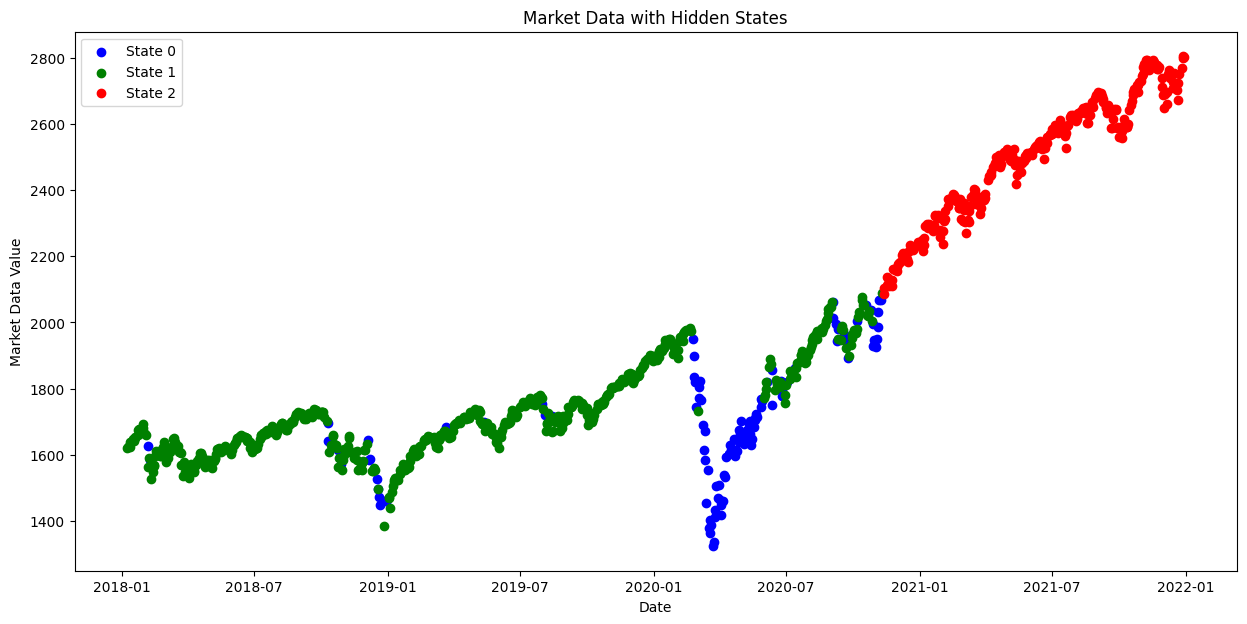

In [ ]:
import matplotlib.pyplot as plt
# Assuming ret is your prepared DataFrame with the correct date index set.

# Choose the date range
start_date = pd.to_datetime('2018-01-03')
end_date = pd.to_datetime('2021-12-30')
selected_data = ret.loc[start_date:end_date]

# Predict the hidden state probabilities for the selected data
probs = GHMM.predict_proba(selected_data.values)

# Get the most likely states for the selected data
states = np.argmax(probs, axis=1)

# Plot settings
colors = ['blue', 'green', 'red']  # Define colors for each state

plt.figure(figsize=(15, 7))

# Plot data
for state_number in range(GHMM.n_components):
    # Identify indexes for the current state
    state_idx = np.where(states == state_number)[0]
    # Plot the data corresponding to the current state
    plt.scatter(selected_data.index[state_idx], selected_data.iloc[state_idx, 0], c=colors[state_number], label=f'State {state_number}')

plt.legend()
plt.title('Market Data with Hidden States')
plt.xlabel('Date')
plt.ylabel('Market Data Value')
plt.show()
